Experiments with Original Mobile-net Model 

In [1]:
import os
import requests
import time

# API endpoint
url = "http://localhost:8000/predict/"

# Base directory for CIFAR-10 images (update this path to your dataset's root directory)
base_dir = "./trainImages"

# Initialize metrics
total_inference_original_model = 0
total_images = 0
correct_predictions = 0

# Loop through each class folder
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip files, we only want directories

    # Loop through each image in the class folder
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue  # Skip non-image files

        # Send image to the API
        with open(image_path, "rb") as f:
            files = {"file": f}
            start_time = time.time()
            response = requests.post(url, files=files)
            end_time = time.time()

            # Process API response
            if response.status_code == 200:
                data = response.json()
                predicted_class = data.get("predicted_class")
                confidence = data.get("confidence")
                inference_time = data.get("inference_time_seconds")

                # Update metrics
                total_inference_original_model += inference_time
                total_images += 1
                if predicted_class == class_name:  # Ground truth is the folder name
                    correct_predictions += 1

            else:
                print(f"Error processing {image_path}: {response.text}")

# Calculate aggregated metrics
average_inference_time_original_model = total_inference_original_model / total_images if total_images > 0 else 0
accuracy_original_model = correct_predictions / total_images if total_images > 0 else 0

print("\nSummary:")
print(f"Total Images Processed: {total_images}")
print(f"Average Inference Time: {average_inference_time_original_model:.12f} seconds")
print(f"Accuracy: {accuracy_original_model * 100:.2f}%")



Summary:
Total Images Processed: 34549
Average Inference Time: 0.036023254529 seconds
Accuracy: 63.61%


Experiments with PCA Optimized Model - Top 500 Features

In [2]:
import os
import requests
import time

# API endpoint
url = "http://localhost:8002/predict/"

# Base directory for CIFAR-10 images (update this path to your dataset's root directory)
base_dir = "./trainImages"

# Initialize metrics
total_inference_pca500_model = 0
total_images = 0
correct_predictions = 0

# Loop through each class folder
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip files, we only want directories

    # Loop through each image in the class folder
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue  # Skip non-image files

        # Send image to the API
        with open(image_path, "rb") as f:
            files = {"file": f}
            start_time = time.time()
            response = requests.post(url, files=files)
            end_time = time.time()

            # Process API response
            if response.status_code == 200:
                data = response.json()
                predicted_class = data.get("predicted_class")
                confidence = data.get("confidence")
                inference_time = data.get("inference_time_seconds")

                # Update metrics
                total_inference_pca500_model += inference_time
                total_images += 1
                if predicted_class == class_name:  # Ground truth is the folder name
                    correct_predictions += 1

            else:
                print(f"Error processing {image_path}: {response.text}")

# Calculate aggregated metrics
average_inference_time_pca500_model = total_inference_pca500_model / total_images if total_images > 0 else 0
accuracy_pca500_model = correct_predictions / total_images if total_images > 0 else 0

print("\nSummary:")
print(f"Total Images Processed: {total_images}")
print(f"Average Inference Time: {average_inference_time_pca500_model:.12f} seconds")
print(f"Accuracy: {accuracy_pca500_model * 100:.2f}%")



Summary:
Total Images Processed: 34549
Average Inference Time: 0.001855979294 seconds
Accuracy: 74.34%


Experiments with PCA Optimized Model - Top 2000 Features

In [3]:
import os
import requests
import time

# API endpoint
url = "http://localhost:8001/predict/"

# Base directory for CIFAR-10 images (update this path to your dataset's root directory)
base_dir = "./trainImages"

# Initialize metrics
total_inference_pca2000_model = 0
total_images = 0
correct_predictions = 0

# Loop through each class folder
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip files, we only want directories

    # Loop through each image in the class folder
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue  # Skip non-image files

        # Send image to the API
        with open(image_path, "rb") as f:
            files = {"file": f}
            start_time = time.time()
            response = requests.post(url, files=files)
            end_time = time.time()

            # Process API response
            if response.status_code == 200:
                data = response.json()
                predicted_class = data.get("predicted_class")
                confidence = data.get("confidence")
                inference_time = data.get("inference_time_seconds")

                # Update metrics
                total_inference_pca2000_model += inference_time
                total_images += 1
                if predicted_class == class_name:  # Ground truth is the folder name
                    correct_predictions += 1

            else:
                print(f"Error processing {image_path}: {response.text}")

# Calculate aggregated metrics
average_inference_time_pca2000_model = total_inference_pca2000_model / total_images if total_images > 0 else 0
accuracy_pca2000_model = correct_predictions / total_images if total_images > 0 else 0

print("\nSummary:")
print(f"Total Images Processed: {total_images}")
print(f"Average Inference Time: {average_inference_time_pca2000_model:.12f} seconds")
print(f"Accuracy: {accuracy_pca2000_model * 100:.2f}%")



Summary:
Total Images Processed: 34549
Average Inference Time: 0.001862465543 seconds
Accuracy: 68.04%


Accumulated Metrics

In [4]:
# Collect results
results = {
    "Model": ["Full Model", "Top 2000 Components", "Top 500 Components"],
    "Accuracy": [accuracy_original_model, accuracy_pca500_model, accuracy_pca2000_model],
    "Inference Time (s)": [average_inference_time_original_model, average_inference_time_pca500_model, average_inference_time_pca2000_model]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Inference Time (s)
0           Full Model  0.636140            0.036023
1  Top 2000 Components  0.743408            0.001856
2   Top 500 Components  0.680425            0.001862


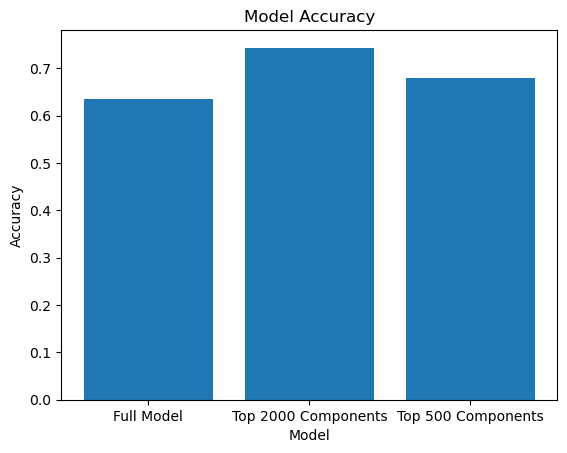

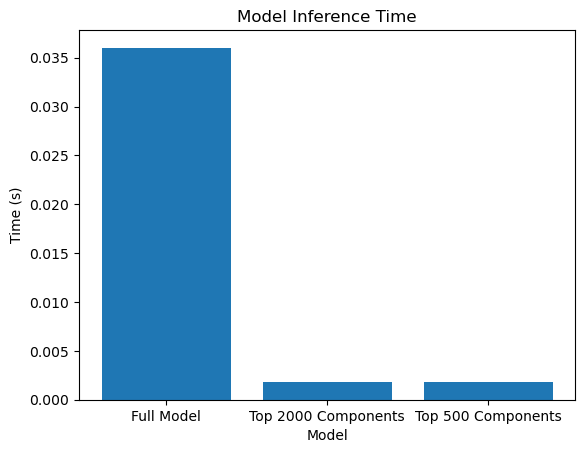

In [5]:
import matplotlib.pyplot as plt

# Accuracy
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

# Inference Time
plt.bar(results_df["Model"], results_df["Inference Time (s)"])
plt.title("Model Inference Time")
plt.ylabel("Time (s)")
plt.xlabel("Model")
plt.show()
